In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_excel("diwali.xlsx")

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

<Axes: >

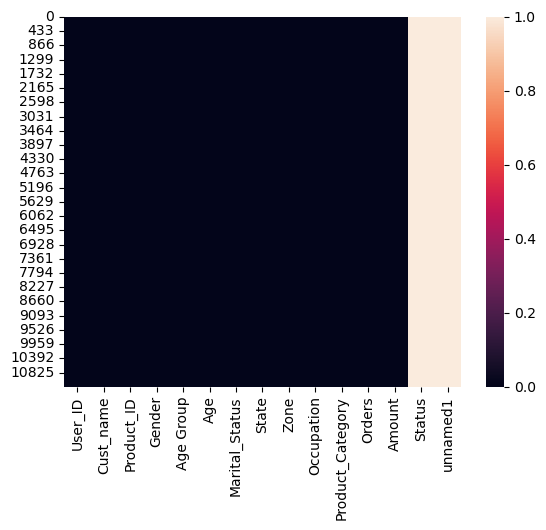

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()/df.shape[0]*100

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [10]:
df.drop(columns=["Status","unnamed1"],inplace=True)

In [11]:
df.shape

(11251, 13)

<Axes: >

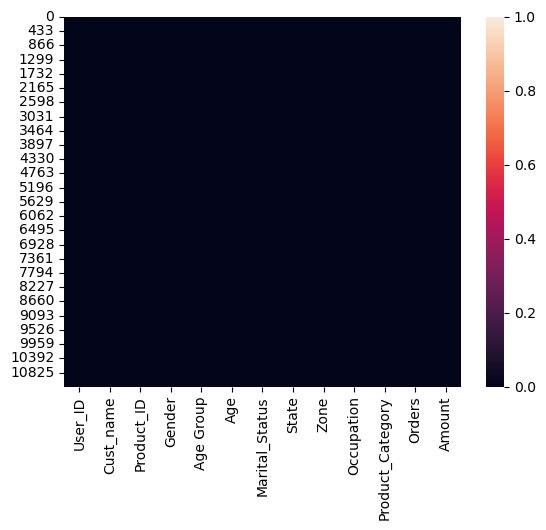

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [16]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

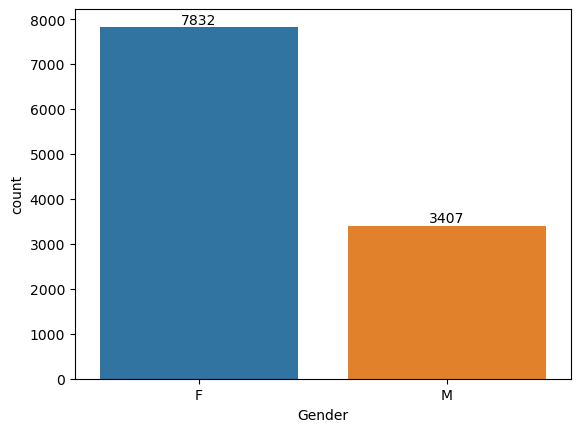

In [20]:
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

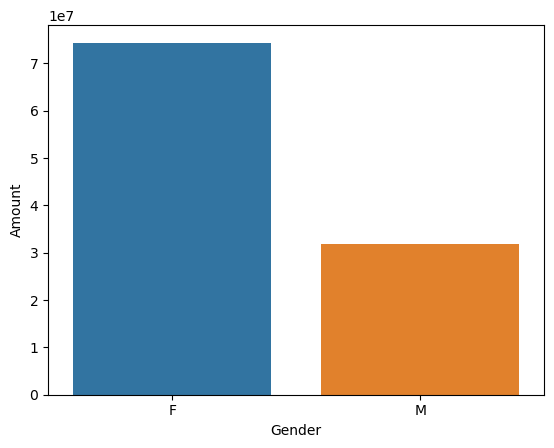

In [24]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=sales_gen)

# Age

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

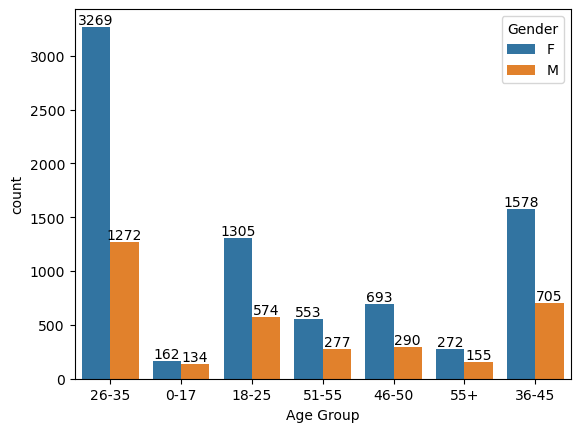

In [27]:
ax=sns.countplot(x="Age Group",hue="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

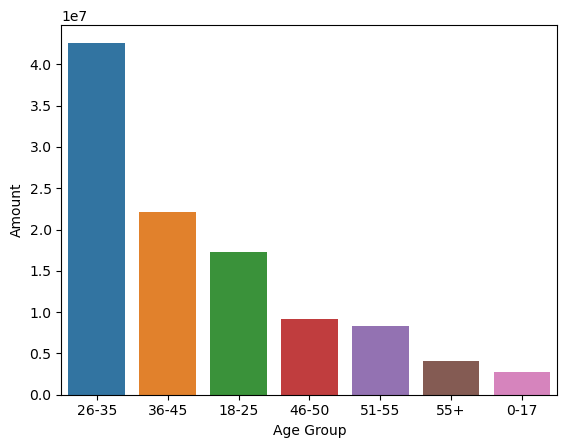

In [29]:
sales_Agegroup=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=sales_Agegroup)

## State

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

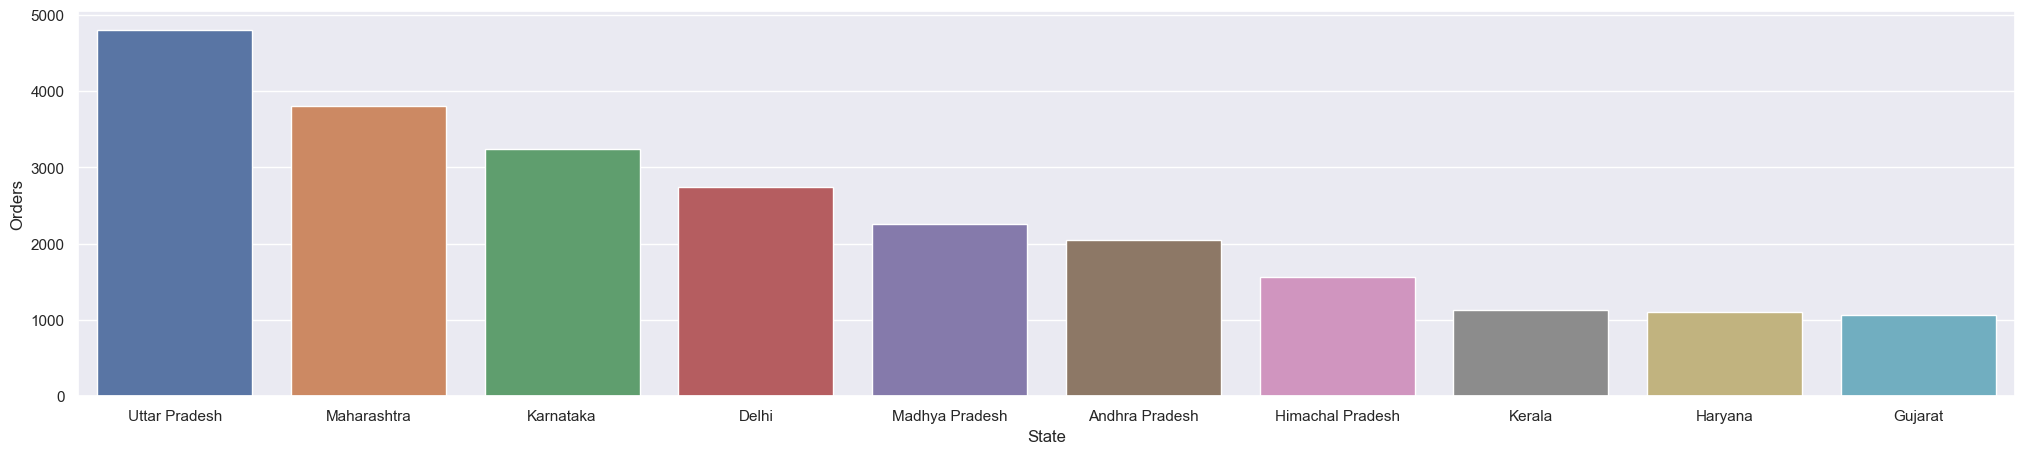

In [36]:
sales_state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(x="State",y="Orders",data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

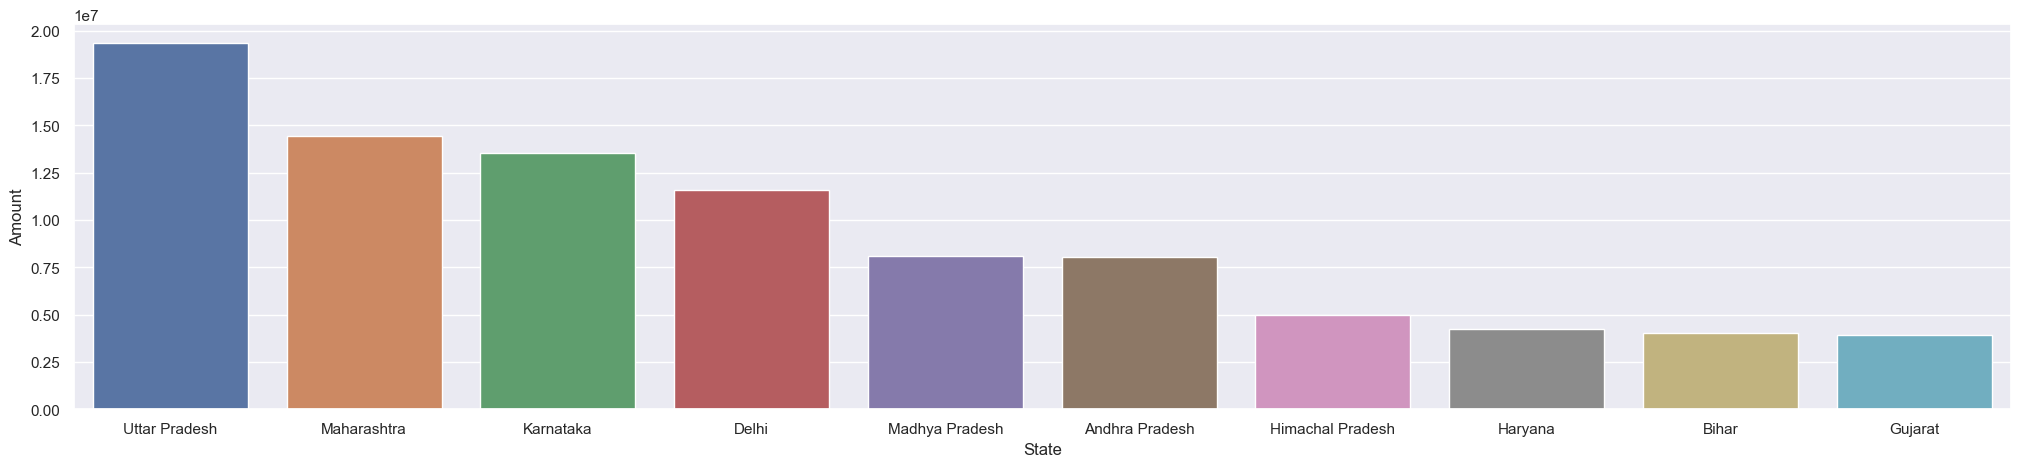

In [37]:
sales_state=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(x="State",y="Amount",data=sales_state)

## Marital Status

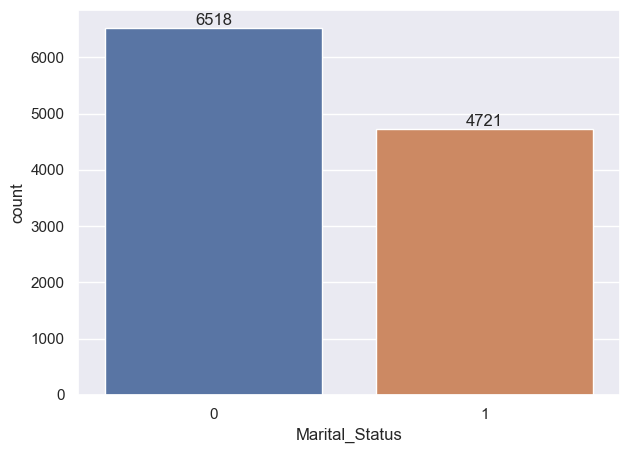

In [54]:
ax=sns.countplot(x="Marital_Status",data=df)

for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={"figure.figsize":(7,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

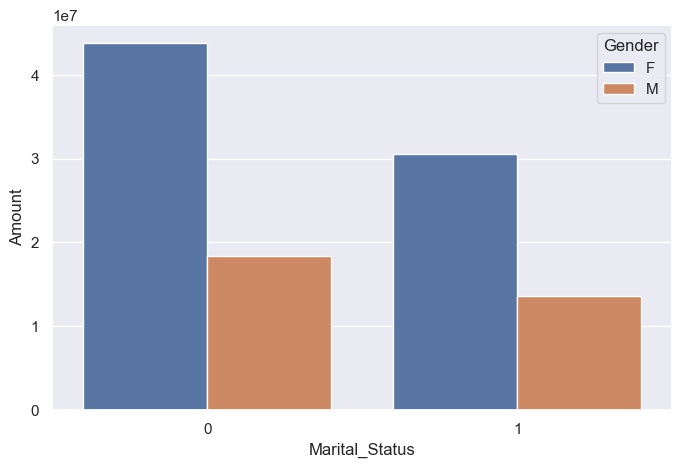

In [58]:
sales_status=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(8,5)})
sns.barplot(x="Marital_Status",y="Amount",data=sales_status,hue="Gender")

## Occupation

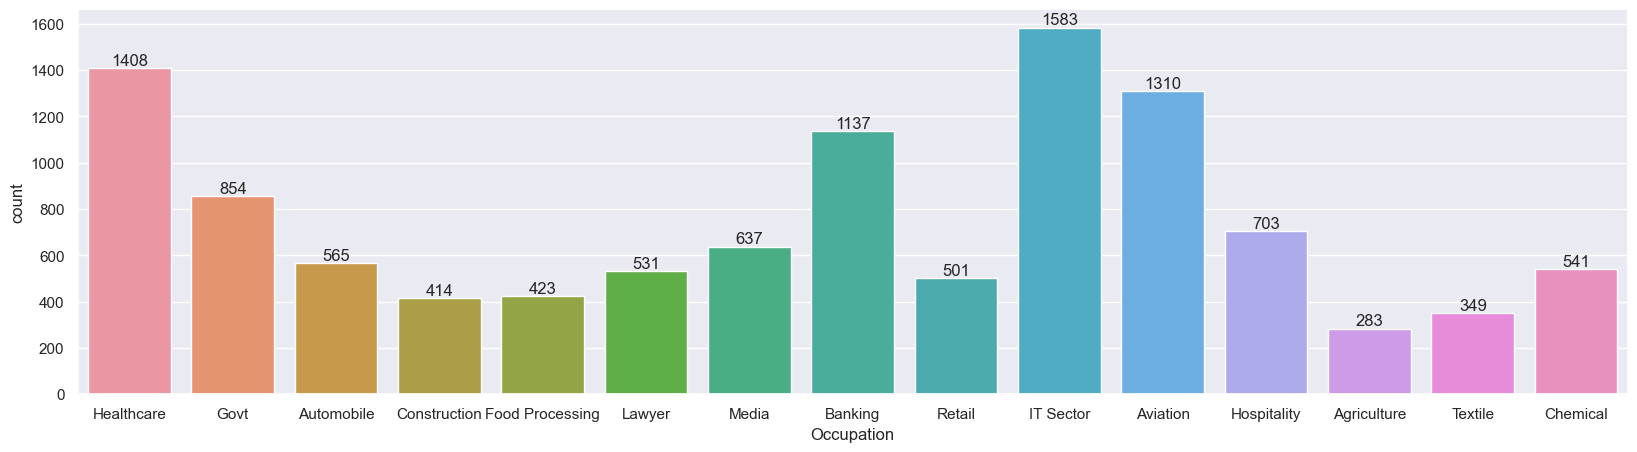

In [60]:
sns.set(rc={"figure.figsize":(20,5)})
ax=sns.countplot(x="Occupation",data=df)

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

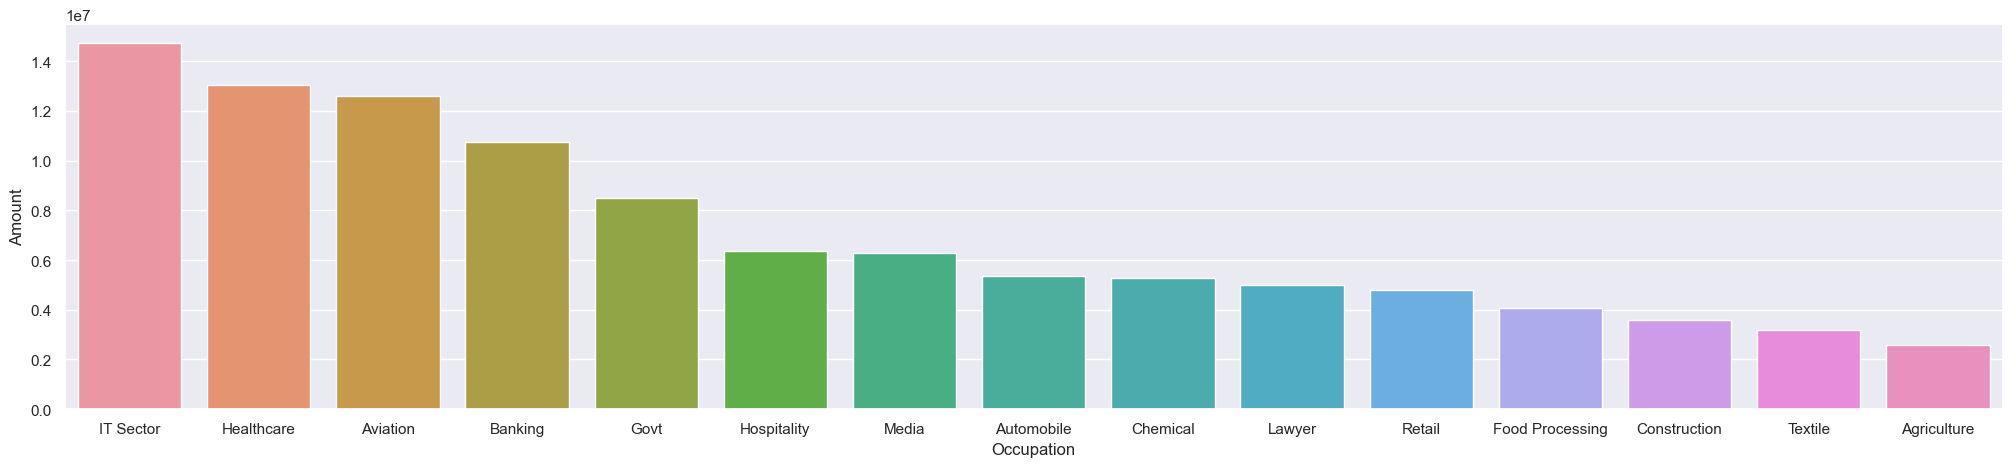

In [63]:
sales_state=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(x="Occupation",y="Amount",data=sales_state)

## Product Category 

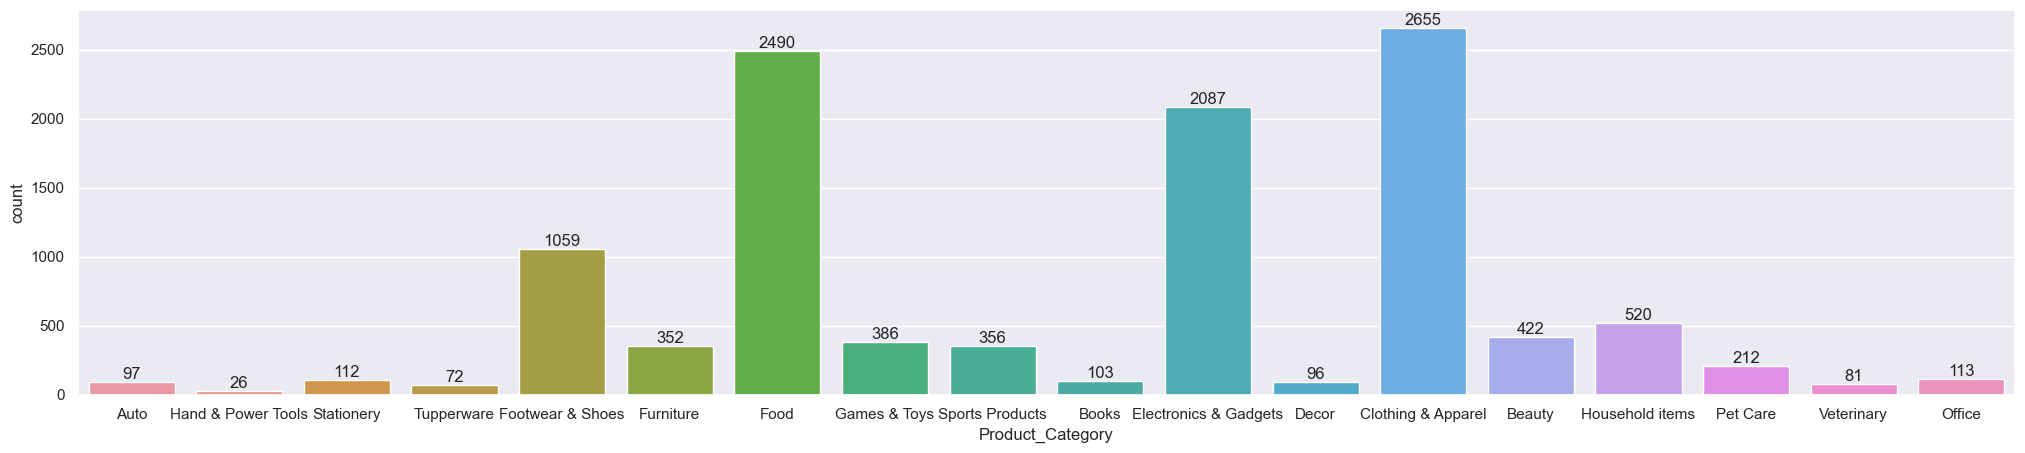

In [65]:
sns.set(rc={"figure.figsize":(25,5)})
ax=sns.countplot(x="Product_Category",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

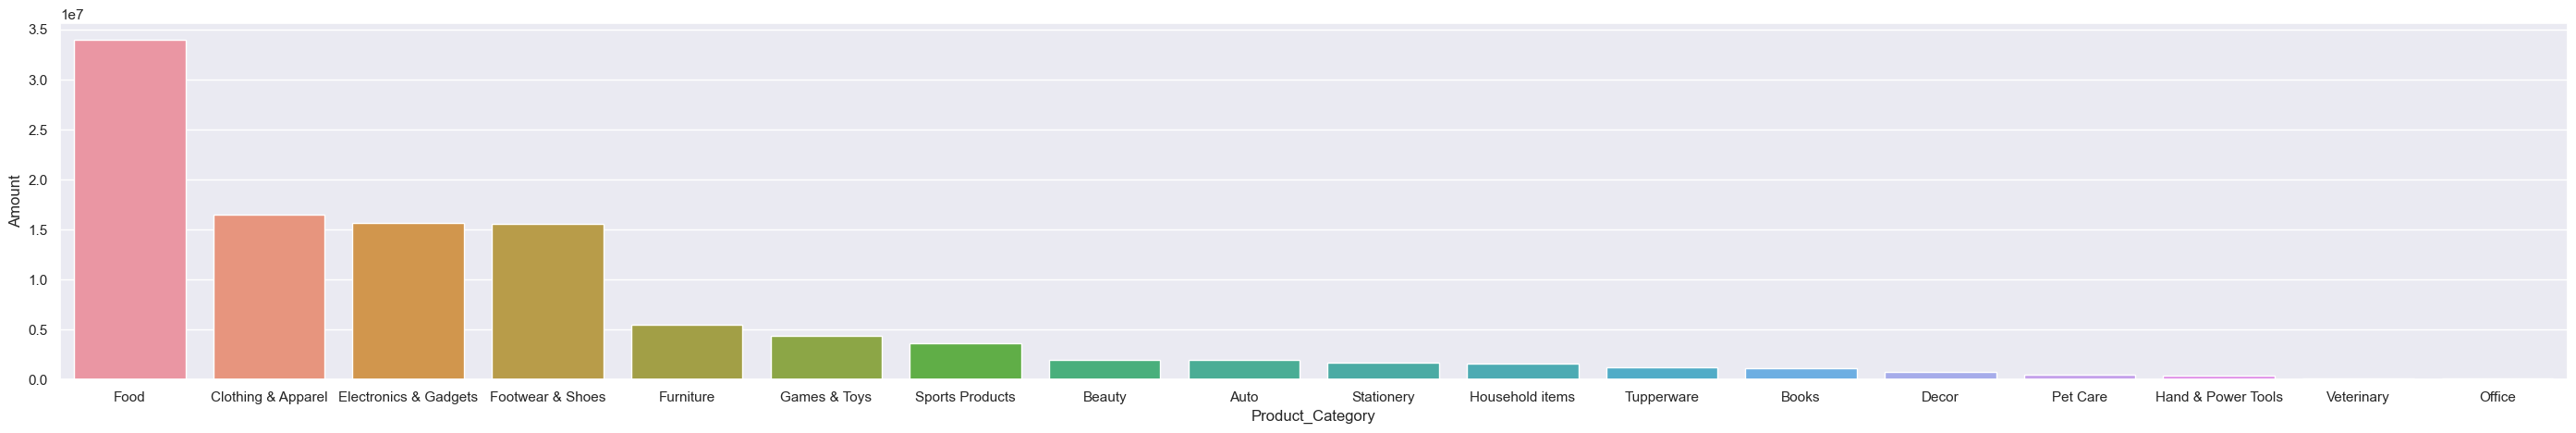

In [70]:
sns.set(rc={"figure.figsize":(35,5)})
sales_state=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

sns.barplot(x="Product_Category",y="Amount",data=sales_state)

<Axes: xlabel='Product_ID', ylabel='Orders'>

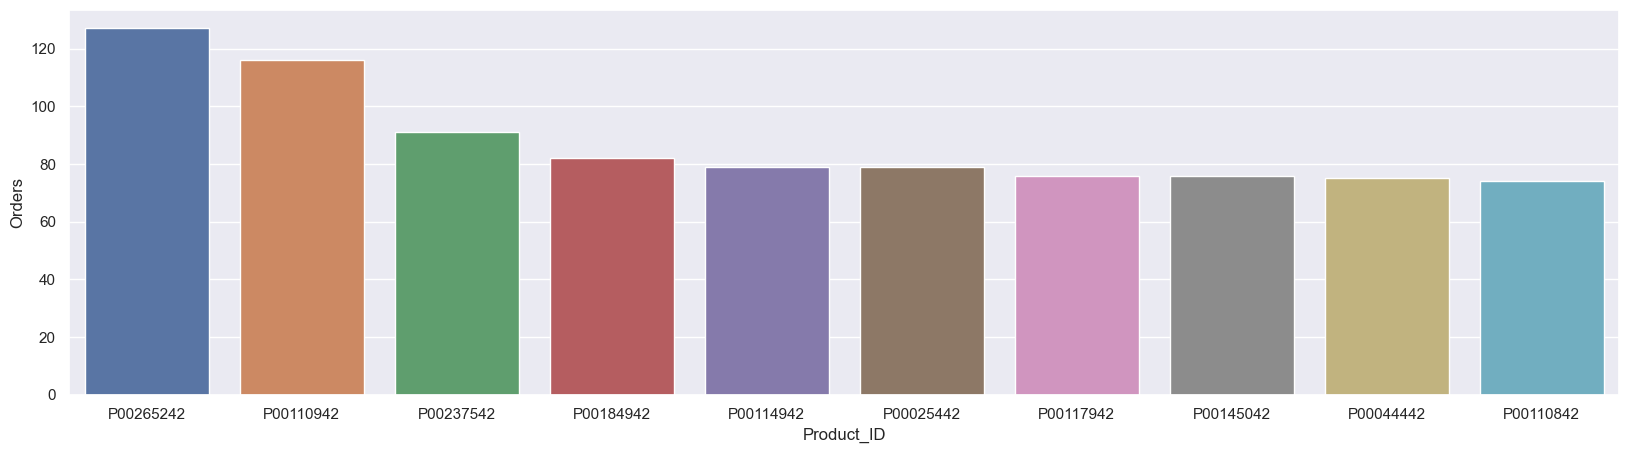

In [73]:
sns.set(rc={"figure.figsize":(20,5)})
sales_state=df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)

sns.barplot(x="Product_ID",y="Orders",data=sales_state)

## Conclusion:

Married women are group 26-35 yrs from Up,Maharashtra and Karnataka working in IT,Healthcare and aviation are more likely to buy product from food,clothing and electronic Category